In [1]:
using PyCall
# to install the ucimlrepo python package run the following command
# run(`$(PyCall.python) -m pip install  ucimlrepo`)


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /home/benkj/.pyenv/versions/3.10.12/bin/python3 -m pip install --upgrade pip


Process(`/home/benkj/.pyenv/versions/3.10.12/bin/python3 -m pip install ucimlrepo`, ProcessExited(0))

In [3]:
# adapted from  https://archive.ics.uci.edu/dataset/63/lymphography
uci = pyimport("ucimlrepo")
lymphography = uci.fetch_ucirepo(id=63) 

Dict{Any, Any} with 3 entries:
  "variables" => PyObject                name     role         type  ... descri…
  "data"      => Dict{Any, Any}("headers"=>PyObject Index(['class', 'lymphatics…
  "metadata"  => Dict{Any, Any}("demographics"=>Any[], "missing_values_symbol"=…

In [7]:
lymphography["variables"]

,name,role,type,demographic,description,units,missing_values
0,class,Target,Integer,None,None,None,no
1,lymphatics,Feature,Integer,None,None,None,no
2,block of affere,Feature,Integer,None,None,None,no
3,bl. of lymph. c,Feature,Integer,None,None,None,no
4,bl. of lymph. s,Feature,Integer,None,None,None,no
5,by pass,Feature,Integer,None,None,None,no
6,extravasates,Feature,Integer,None,None,None,no
7,regeneration of,Feature,Integer,None,None,None,no
8,early uptake in,Feature,Integer,None,None,None,no
9,lym.nodes dimin,Feature,Integer,None,None,None,no


In [12]:
X = lymphography["data"]["features"]

,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,4,2,1,1,1,1,1,2,1,2,2,2,4,4,1,1,2,2,NaN
1,3,2,1,1,2,2,1,2,1,3,3,2,3,3,2,2,2,2,NaN
2,3,2,2,2,2,2,2,2,1,4,3,3,4,4,3,2,2,7,NaN
3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6,NaN
4,3,1,1,1,1,1,1,1,1,2,2,4,3,3,1,2,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3,2,1,1,2,2,1,2,1,2,2,4,3,3,2,2,2,4,NaN
144,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,NaN
145,2,2,1,1,1,2,1,2,1,3,3,3,3,3,3,2,2,4,NaN
146,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1,NaN


In [13]:
Y = lymphography["data"]["targets"]

,class
0,3
1,2
2,3
3,3
4,2
...,...
143,3
144,2
145,3
146,2


In [14]:
using Plots,LaTeXStrings,JLD2  
include("mpsforecast.jl")

In [61]:
# use the "lymphatics" data and subtract 1 to start from 0
data = convert(Vector{Int},X.lymphatics) .- 1
past = data[1:138]
future = data[139:end]

forecast(model) = prob(model,future,memory(model,past));

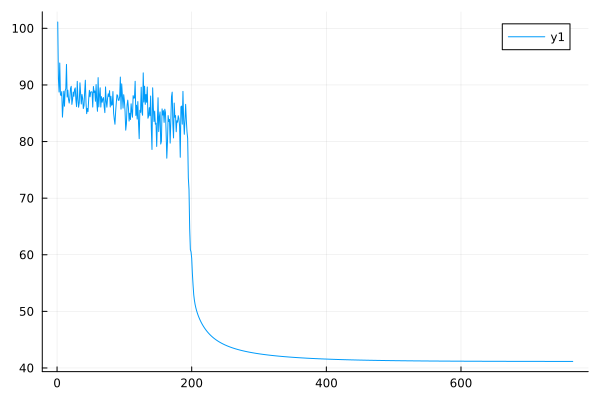

In [114]:
q, ll = fitquantum(16,data; η=1e-1,c=0.99)
plot(ll)

In [115]:
forecast(q)

0.02007105404835551

In [116]:
function cl()
    c = fitclassical(16,data)
    forecast(c)
end

cres = [ cl() for i=1:10]

10-element Vector{Float64}:
 0.00017041431335173938
 0.00098113665351644
 0.004110952944740837
 0.0014147489208485027
 0.0036061165983804944
 0.0012390558923398504
 0.010314249262822586
 0.0025838723946415352
 0.0070563379816127175
 0.0001704180208932901

In [117]:
max(cres...)

0.010314249262822586

# Increase memory

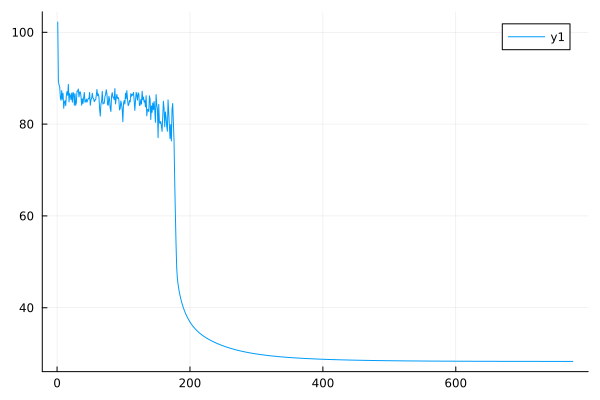

In [118]:
q, ll = fitquantum(32,data; η=1e-1,c=0.99)
plot(ll)

In [119]:
forecast(q)

0.06498281458811804

In [120]:
function cl()
    c = fitclassical(32,data)
    forecast(c)
end

cres = [ cl() for i=1:10]

10-element Vector{Float64}:
 0.03309895811927751
 0.00017041548886058384
 0.00017041579343125618
 0.03634109214563364
 0.00017041656263789607
 0.00017041622677936002
 0.00017041548663399023
 0.00017041401109650427
 0.00017041804157874322
 0.00017041410487218515